In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB

In [2]:
# Simulate data
np.random.seed(42)
n_samples = 100000

data = pd.DataFrame({
    'Nivel_Experiencia': np.random.choice(['Bajo', 'Medio', 'Alto'], size=n_samples, p=[0.3, 0.4, 0.3]),
    'Equipamiento': np.random.choice(['Básico', 'Intermedio', 'Avanzado'], size=n_samples, p=[0.4, 0.35, 0.25]),
    'Habilidades': np.random.choice(['Bajas', 'Medias', 'Altas'], size=n_samples, p=[0.3, 0.4, 0.3]),
    'Salud': np.random.choice(['Baja', 'Media', 'Alta'], size=n_samples, p=[0.25, 0.45, 0.3]),
    'Estado_Mental': np.random.choice(['Negativo', 'Neutral', 'Positivo'], size=n_samples, p=[0.2, 0.4, 0.4]),
    'Exito_Mision': np.random.choice(['Sí', 'No'], size=n_samples, p=[0.6, 0.4])
})


In [3]:
# Adjust probabilities based on character attributes
data.loc[
    (data['Nivel_Experiencia'] == 'Alto') &
    (data['Equipamiento'] == 'Avanzado') &
    (data['Habilidades'] == 'Altas') &
    (data['Salud'] != 'Baja') &
    (data['Estado_Mental'] == 'Positivo'),
    'Exito_Mision'
] = np.random.choice(['Sí', 'No'], p=[0.95, 0.05],
    size=len(data[
        (data['Nivel_Experiencia'] == 'Alto') &
        (data['Equipamiento'] == 'Avanzado') &
        (data['Habilidades'] == 'Altas') &
        (data['Salud'] != 'Baja') &
        (data['Estado_Mental'] == 'Positivo')
    ])
)

data.loc[
    (data['Nivel_Experiencia'] == 'Bajo') &
    (data['Equipamiento'] == 'Básico') &
    (data['Habilidades'] == 'Bajas') &
    (data['Salud'] == 'Baja') &
    (data['Estado_Mental'] == 'Negativo'),
    'Exito_Mision'
] = np.random.choice(['Sí', 'No'], p=[0.05, 0.95],
    size=len(data[
        (data['Nivel_Experiencia'] == 'Bajo') &
        (data['Equipamiento'] == 'Básico') &
        (data['Habilidades'] == 'Bajas') &
        (data['Salud'] == 'Baja') &
        (data['Estado_Mental'] == 'Negativo')
    ])
)


In [4]:
# Encode categorical variables
encoder = OrdinalEncoder()
X = encoder.fit_transform(
    data[['Nivel_Experiencia', 'Equipamiento', 'Habilidades', 'Salud', 'Estado_Mental']]
)

y = data['Exito_Mision'].map({'No': 0, 'Sí': 1})

In [5]:
# Train Naive Bayes model
model = CategoricalNB()
model.fit(X, y)

# Predict probabilities for each combination
combinations = pd.DataFrame({
    'Nivel_Experiencia': ['Alto', 'Bajo'],
    'Equipamiento': ['Avanzado', 'Básico'],
    'Habilidades': ['Altas', 'Bajas'],
    'Salud': ['Alta', 'Baja'],
    'Estado_Mental': ['Positivo', 'Negativo']
})

X_new = encoder.transform(combinations)
probs = model.predict_proba(X_new)

In [6]:
# Add probabilities to the combinations DataFrame
combinations['P(Fracaso)'] = probs[:, 0]
combinations['P(Éxito)'] = probs[:, 1]

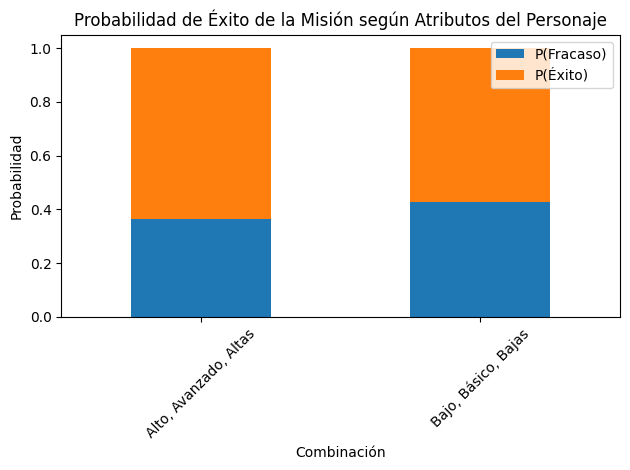

In [7]:
# Combine attributes into a single label for the x-axis
combinations['Etiqueta'] = combinations.apply(
    lambda row: f"{row['Nivel_Experiencia']}, {row['Equipamiento']}, {row['Habilidades']}",
    axis=1
)

# Plot the probabilities
combinations.plot(
    x='Etiqueta',
    y=['P(Fracaso)', 'P(Éxito)'],
    kind='bar',
    stacked=True
)

plt.title('Probabilidad de Éxito de la Misión según Atributos del Personaje')
plt.xlabel('Combinación')
plt.ylabel('Probabilidad')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()

# Save the plot
plt.savefig('probabilidades_exito_mision_naive_bayes.png')